In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
!unzip /content/drive/MyDrive/FacialExpressionsRecognition/fer.zip

Streaming output truncated to the last 5000 lines.
 extracting: fer/train/Surprise/2083.jpg  
 extracting: fer/train/Surprise/2084.jpg  
 extracting: fer/train/Surprise/2085.jpg  
 extracting: fer/train/Surprise/2086.jpg  
 extracting: fer/train/Surprise/2087.jpg  
 extracting: fer/train/Surprise/2088.jpg  
 extracting: fer/train/Surprise/2089.jpg  
 extracting: fer/train/Surprise/209.jpg  
 extracting: fer/train/Surprise/2090.jpg  
 extracting: fer/train/Surprise/2091.jpg  
 extracting: fer/train/Surprise/2092.jpg  
 extracting: fer/train/Surprise/2093.jpg  
 extracting: fer/train/Surprise/2094.jpg  
 extracting: fer/train/Surprise/2095.jpg  
 extracting: fer/train/Surprise/2096.jpg  
 extracting: fer/train/Surprise/2097.jpg  
 extracting: fer/train/Surprise/2098.jpg  
 extracting: fer/train/Surprise/2099.jpg  
 extracting: fer/train/Surprise/21.jpg  
 extracting: fer/train/Surprise/210.jpg  
 extracting: fer/train/Surprise/2100.jpg  
 extracting: fer/train/Surprise/2101.jpg  
 extrac

In [11]:
train_path = '/content/fer/train'
validation_path = '/content/fer/validation'

In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications import MobileNet,vgg16

In [13]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.2,
                                   rotation_range=30,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   horizontal_flip=True,
                                   )
validation_datagen = ImageDataGenerator(rescale=1./255)

In [14]:
train_set = train_datagen.flow_from_directory(directory=train_path,
                                              target_size=(48,48),
                                              color_mode='grayscale',
                                              class_mode='categorical',
                                              batch_size=32,
                                              shuffle=True)
validation_set = validation_datagen.flow_from_directory(directory=validation_path,
                                              target_size=(48,48),
                                              color_mode='grayscale',
                                              class_mode='categorical',
                                              batch_size=32,
                                              )

Found 24256 images belonging to 5 classes.
Found 3006 images belonging to 5 classes.


In [15]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer='he_normal',input_shape=(48,48,1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same',activation='relu',kernel_initializer='he_normal'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3), padding='same',activation='relu',kernel_initializer='he_normal'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=(3,3), padding='same',activation='relu',kernel_initializer='he_normal'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=64, activation='relu',kernel_initializer='he_normal'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Dense(units=64, activation='relu',kernel_initializer='he_normal'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Dense(units=5, activation='softmax',kernel_initializer='he_normal'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
batch_normalization_6 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_7 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 64)       

In [16]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
class MyCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('accuracy') > 0.10):
                print("\nReached 10% accuracy so cancelling training!")
                self.model.stop_training = True
callbacks = MyCallback()

In [21]:
history=model.fit(train_set,validation_data=validation_set,epochs=500,verbose=1)

Epoch 1/500
758/758 [==============================] - 52s 24ms/step - loss: 1.8559 - accuracy: 0.2584 - val_loss: 1.5571 - val_accuracy: 0.3087
Epoch 2/500
758/758 [==============================] - 18s 24ms/step - loss: 1.5333 - accuracy: 0.3344 - val_loss: 1.4283 - val_accuracy: 0.3955
Epoch 3/500
758/758 [==============================] - 18s 24ms/step - loss: 1.4279 - accuracy: 0.3910 - val_loss: 1.3401 - val_accuracy: 0.4491
Epoch 4/500
758/758 [==============================] - 18s 24ms/step - loss: 1.3518 - accuracy: 0.4348 - val_loss: 1.4714 - val_accuracy: 0.4458
Epoch 5/500
758/758 [==============================] - 18s 24ms/step - loss: 1.2738 - accuracy: 0.4778 - val_loss: 1.2855 - val_accuracy: 0.5173
Epoch 6/500
758/758 [==============================] - 18s 24ms/step - loss: 1.2241 - accuracy: 0.5043 - val_loss: 1.3221 - val_accuracy: 0.5200
Epoch 7/500
758/758 [==============================] - 18s 24ms/step - loss: 1.1686 - accuracy: 0.5290 - val_loss: 1.2979 - val_ac

In [22]:
model.save('/content/drive/MyDrive/FacialExpressionsRecognition/covnet_model_face.h5')

In [23]:
model_json = model.to_json()
with open("/content/drive/MyDrive/FacialExpressionsRecognition/covnet_Json_adam.json", "w") as json_file:
    json_file.write(model_json)

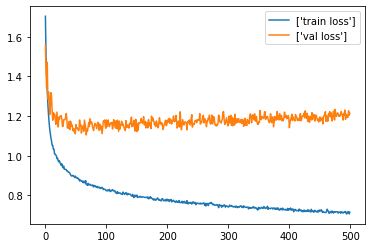

In [24]:
plt.plot(history.history['loss'], label=['train loss'])
plt.plot(history.history['val_loss'], label=['val loss'])
plt.legend()
plt.show()

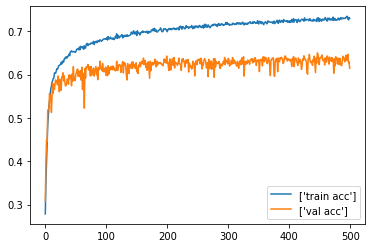

In [25]:
plt.plot(history.history['accuracy'], label=['train acc'])
plt.plot(history.history['val_accuracy'], label=['val acc'])
plt.legend()
plt.show()

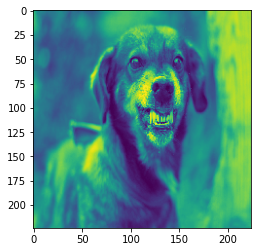

In [ ]:
import cv2
import numpy as np

img_path='/content/dog2.jpg'
img=image.load_img(img_path, target_size=(224, 224))
img=cv2.cvtColor(np.float32(img), cv2.COLOR_BGR2GRAY)
plt.imshow(img)
